<a href="https://colab.research.google.com/github/KINSMICKETxD/ATMProjectV1/blob/master/SVMDEMO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

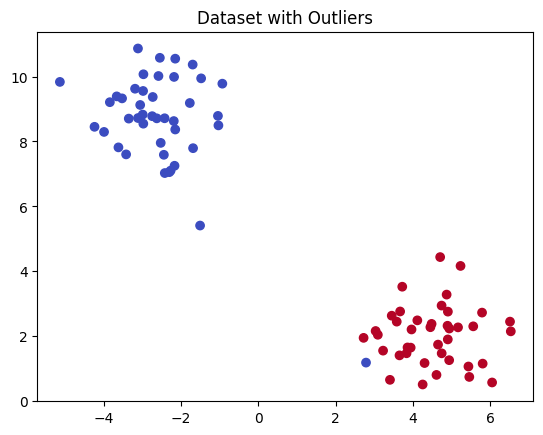

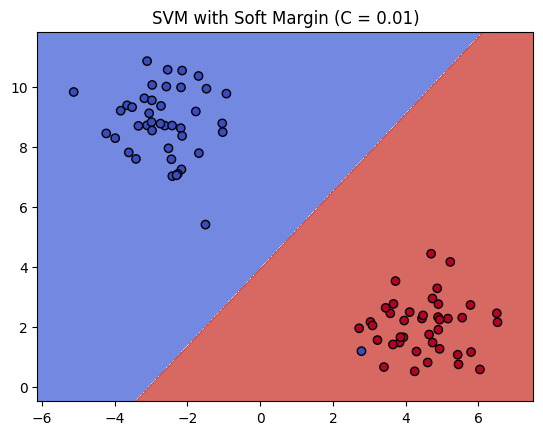

Accuracy on test data with C=0.01: 100.00%


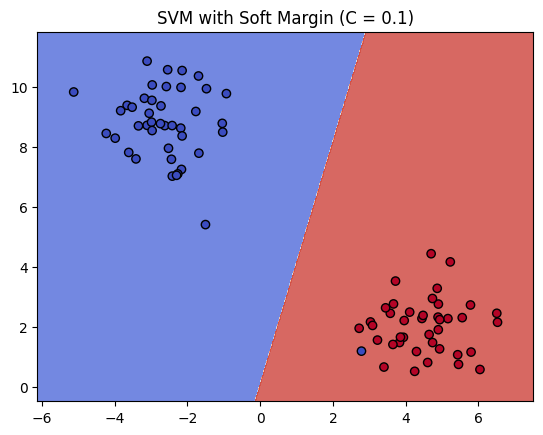

Accuracy on test data with C=0.1: 100.00%


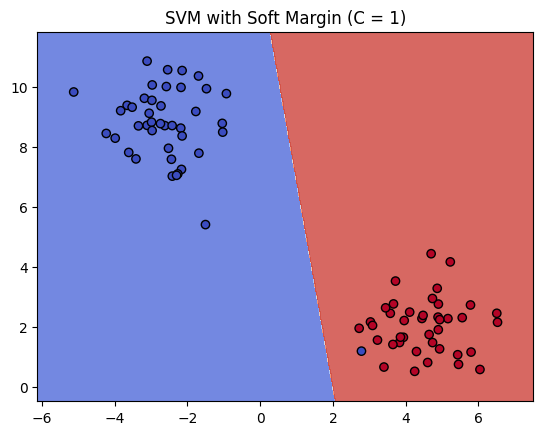

Accuracy on test data with C=1: 100.00%


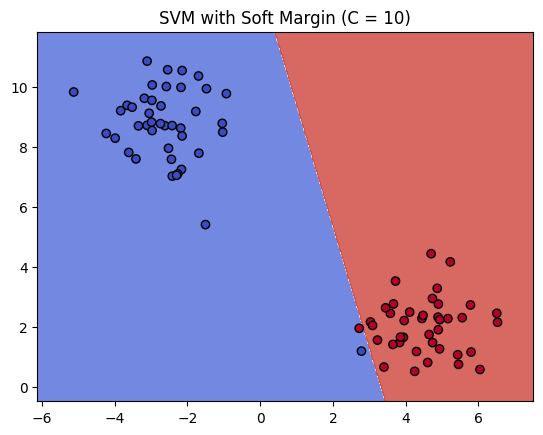

Accuracy on test data with C=10: 96.00%


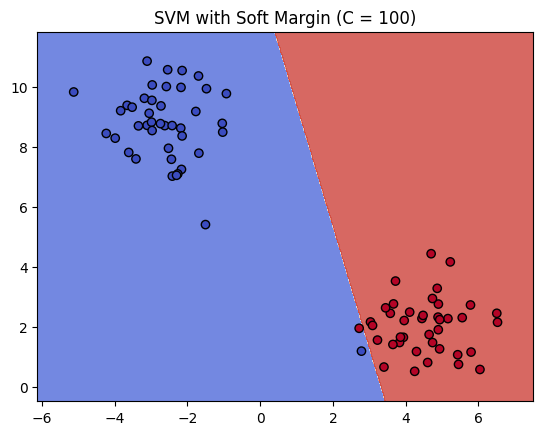

Accuracy on test data with C=100: 96.00%


In [4]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Step 2: Create a dataset with outliers
np.random.seed(42)
# Generate two clusters of points (2 classes)
X, y = datasets.make_blobs(n_samples=80, centers=2, random_state=42, cluster_std=1.0)

# Introduce some outliers in class 0
outliers = np.random.uniform(low=-6, high=6, size=(2, 2))  # Create 2 outlier points
X = np.vstack([X, outliers])  # Add outliers to the dataset
y = np.append(y, [0, 0])  # Label the outliers as class 0

# Visualize the dataset with outliers
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
plt.title("Dataset with Outliers")
plt.show()

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Function to train SVM and plot the decision boundary with a given C value
def train_and_plot_svm(C_value):
    # Train the SVM model with the given C value
    svm = SVC(kernel='linear', C=C_value)
    svm.fit(X_train, y_train)

    # Create a mesh grid for plotting the decision boundary
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margin
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(f"SVM with Soft Margin (C = {C_value})")
    plt.show()

    # Print model accuracy
    accuracy = svm.score(X_test, y_test)
    print(f"Accuracy on test data with C={C_value}: {accuracy * 100:.2f}%")

# Step 5: Test with different values of C
C_values = [0.01, 0.1, 1, 10, 100]  # You can adjust these values
for C in C_values:
    train_and_plot_svm(C)


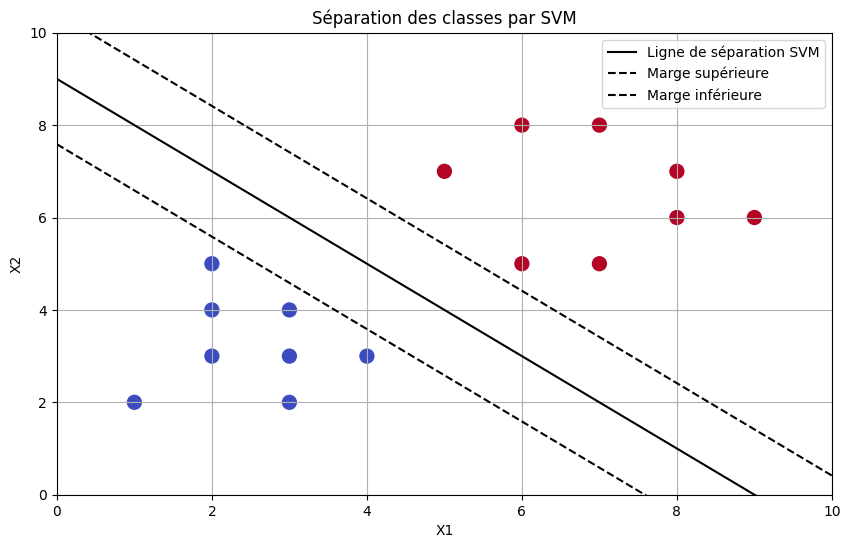

In [12]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Définir les points des deux classes
X = np.array([
    # Classe A
    [2, 3], [3, 3], [3, 4], [1, 2], [2, 4],
    [2, 5], [3, 2], [4, 3],
    # Classe B
    [6, 5], [7, 8], [8, 6], [5, 7], [6, 8],
    [7, 5], [8, 7], [9, 6]
])  # Coordonnées des points
y = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]  # 0 pour Classe A, 1 pour Classe B

# Entraîner un modèle SVM linéaire
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Obtenir les coefficients de la ligne de séparation (hyperplan)
w = clf.coef_[0]
slope = -w[0] / w[1]  # Pente de la ligne de séparation
intercept = -clf.intercept_[0] / w[1]  # Ordonnée à l'origine

# Créer une fonction pour la ligne de séparation
def line(x):
    return slope * x + intercept

# Tracer les points et la ligne de séparation
plt.figure(figsize=(10, 6))  # Dimension du graphique
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=100)  # Les points des classes A et B
x_vals = np.linspace(0, 10, 100)  # Générer des valeurs x pour la ligne de séparation
plt.plot(x_vals, line(x_vals), 'k-', label='Ligne de séparation SVM')  # Tracer la ligne SVM

# Tracer les marges
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))  # Calcul de la marge
plt.plot(x_vals, line(x_vals) + margin, 'k--', label='Marge supérieure')  # Marge supérieure
plt.plot(x_vals, line(x_vals) - margin, 'k--', label='Marge inférieure')  # Marge inférieure

# Ajouter des labels et la légende
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.title("Séparation des classes par SVM")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()
